In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:

main_df = pd.read_csv('Bengaluru_House_Data.csv')
main_df.head()

NameError: name 'pd' is not defined

In [ ]:
main_df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df = main_df.drop(['availability', 'society','balcony'], axis='columns')
df

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [ ]:
df.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

data cleaning

there is problem in size with BHK/bedroom

In [ ]:
df['size'] = df['size'].apply(lambda x: int( x.split(' ')[0]))
df


C:\Users\User\AppData\Local\Temp/ipykernel_11056/4180032294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'].apply(lambda x: int( x.split(' ')[0]))


,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4,4689,4.0,488.00


In [ ]:
df['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

############

In [ ]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,price
30,Super built-up Area,Yelahanka,4,2100 - 2850,4.0,186.000
122,Super built-up Area,Hebbal,4,3067 - 8156,4.0,477.000
137,Super built-up Area,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Super built-up Area,Sarjapur,2,1145 - 1340,2.0,43.490
188,Super built-up Area,KR Puram,2,1015 - 1540,2.0,56.800
410,Super built-up Area,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Super built-up Area,Hennur Road,2,1195 - 1440,2.0,63.770
648,Built-up Area,Arekere,9,4125Perch,9.0,265.000
661,Super built-up Area,Yelahanka,2,1120 - 1145,2.0,48.130
672,Built-up Area,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [ ]:
def convert_sq_to_num(x):
    tokens = x.split('-')
    if (len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
df['total_sqft'] = df['total_sqft'].apply(convert_sq_to_num)
df.head()

C:\Users\User\AppData\Local\Temp/ipykernel_11056/3456763210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].apply(convert_sq_to_num)


,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,51.00


In [ ]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [ ]:
plt.scatter(df['size'], df['price'])

NameError: name 'plt' is not defined

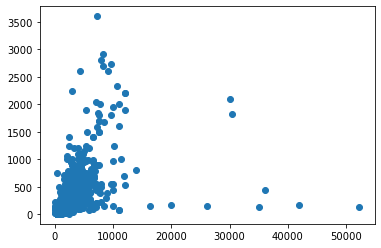

In [ ]:
plt.scatter(df['total_sqft'], df['price'])

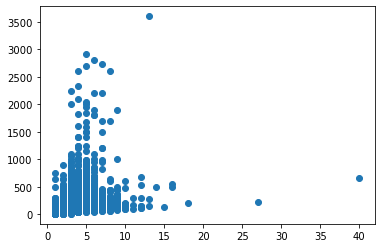

In [ ]:
plt.scatter(df['bath'], df['price'])

in this data set some outliers, apply feature engniering 

size

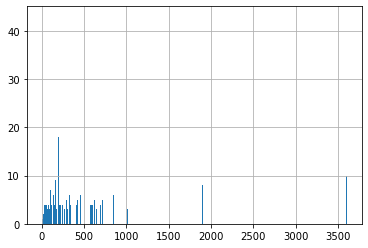

In [ ]:
plt.bar(df['price'], df['size'])
plt.grid()

In [ ]:
max_thresold=df['size'].quantile(0.9)
min_thresold=df['size'].quantile(0.1)
n_df = df[ (df['size']<max_thresold) & (df['size']>min_thresold)]

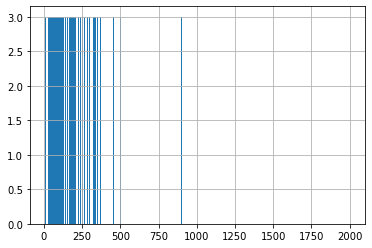

In [ ]:
plt.bar(n_df['price'], n_df['size'])
plt.grid()

total_sqft

In [ ]:
max_thresold=df['total_sqft'].quantile(0.7)
min_thresold=df['total_sqft'].quantile(0.2)
n_df = df[ (df['total_sqft']<max_thresold) & (df['total_sqft']>min_thresold)]

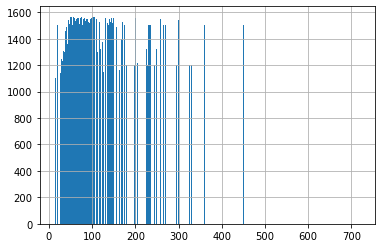

In [ ]:
plt.bar(n_df['price'], n_df['total_sqft'])
plt.grid()

bath

In [ ]:
max_thresold=df['bath'].quantile(0.9)
min_thresold=df['bath'].quantile(0.1)
n_df = df[ (df['bath']<max_thresold) & (df['bath']>min_thresold)]

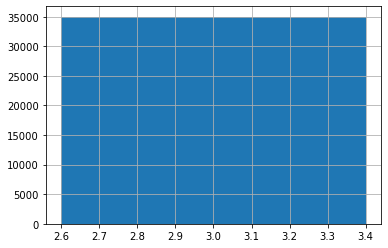

In [ ]:
plt.bar(n_df['bath'], n_df['total_sqft'])
plt.grid()

price

In [ ]:
max_thresold=df['price'].quantile(0.99)
min_thresold=df['price'].quantile(0.01)
n_df = df[ (df['price']<max_thresold) & (df['price']>min_thresold)]

In [ ]:
n_df

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3,1715.0,3.0,112.00
13315,Built-up Area,Whitefield,5,3453.0,4.0,231.00
13316,Super built-up Area,Richards Town,4,3600.0,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00


deal with dummy variable 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [ ]:
n_df['area_type'] = le.fit_transform(n_df['area_type'])
n_df['location'] = le.fit_transform(n_df['location'])

C:\Users\User\AppData\Local\Temp/ipykernel_11056/665687910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df['area_type'] = le.fit_transform(n_df['area_type'])
C:\Users\User\AppData\Local\Temp/ipykernel_11056/665687910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df['location'] = le.fit_transform(n_df['location'])


In [ ]:
n_df

,area_type,location,size,total_sqft,bath,price
0,3,413,2,1056.0,2.0,39.07
1,2,313,4,2600.0,5.0,120.00
2,0,1167,3,1440.0,2.0,62.00
3,3,749,3,1521.0,3.0,95.00
4,3,708,2,1200.0,2.0,51.00
...,...,...,...,...,...,...
13314,3,468,3,1715.0,3.0,112.00
13315,0,1240,5,3453.0,4.0,231.00
13316,3,995,4,3600.0,5.0,400.00
13317,0,963,2,1141.0,2.0,60.00


Model bulding 

In [ ]:
from sklearn.model_selection import train_test_split